In [117]:
import numpy as np
# from numpy import linalg
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
def generate_A(M,N):
    A = np.random.standard_normal(size = (M,N))
    A = normalize(A, axis=0, norm='l2') 
    return A



In [119]:
def generate_x(s,N): #s < N, random # for now
    x = np.zeros(shape=(N,1))
    nonzeros = np.random.choice(N,size = s,replace=False) #replace = False: unique indices
    for i in nonzeros:
        x[i] = np.random.choice([-1,1]) * np.random.uniform(1,10)
    return x



In [120]:
def generate_n(sigma,M,noise): 
    if noise == True:
        n = np.random.normal(loc=0,scale=sigma,size=(M,1))
    else:
        n = np.zeros(shape=(M,1))
    return n

In [121]:
def generate_y(M,N,s,sigma,noise):
    A = generate_A(M,N)
    x = generate_x(s,N)
    s_i = np.nonzero(x)[0]
    n = generate_n(sigma,M,noise)
    y = A.dot(x)+n
    return y, A, x, s_i
    
    

In [122]:

def OMP(A,y,threshold):
    r = y
    indices = []
    while np.linalg.norm(r,ord=2) > threshold:
        A_i = np.argmax(np.absolute(A.T.dot(r)))
        indices.append(A_i)
        A_omp = A[:,indices] #get whole column that cause largest A_col.T.dot(r)
        x_hat = np.zeros(shape=(A.shape[1],1))
        x_hat[indices] = np.linalg.inv(A_omp.T.dot(A_omp)).dot(A_omp.T).dot(y) #replace initial 0 with new x value
        r = y - A.dot(x_hat)
    return r, indices, x_hat


In [123]:
def simulation(M, N, s, sigma, threshold=1e-8,noise=False):
    normalized_error = 0
    exact_support_recovery = 0 #ESR
    for runs in range(2000):
        y, A, x, s_i= generate_y(M,N,s,sigma,noise)
        _, indices, x_hat = OMP(A,y,threshold)
        if set(indices) == set(s_i):
            exact_support_recovery += 1
        numerator = np.linalg.norm(x-x_hat,ord=2)
        denominator = np.linalg.norm(x,ord=2)
        if denominator != 0:
            normalized_error += numerator/denominator
    av_normalized_error = normalized_error/2000
    prob_ESR = exact_support_recovery/2000
    return av_normalized_error, prob_ESR



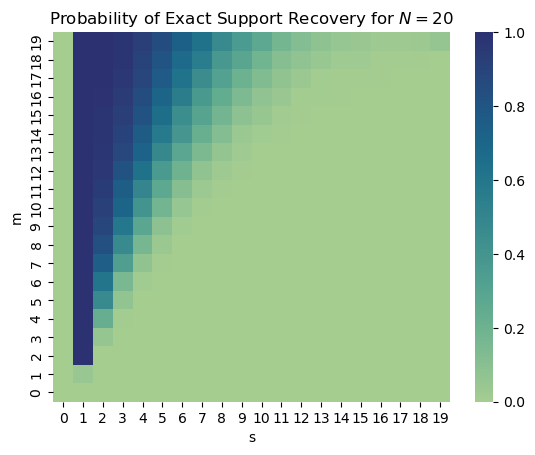

In [124]:
'''
Case 1: N=20
'''
# M<N
def noiseless_phase_transition(N,noise):
    M_range = range(0,N)
    smax = range(0, N)
    prob_ESR_data = np.empty((len(M_range),len(smax)))
    for m in M_range:
        for s in smax:
            if m > 0 and s > 0:
                if s <= m: #inf solution for s>m (eq less than unknown)
                    av_normalized_error, prob_ESR = simulation(m, N, s, sigma=0,threshold=1e-5,noise=False)
                    prob_ESR_data[m,s] = prob_ESR
            else:
                prob_ESR_data[m,s] = 0.0

    heatmap_n0 = sns.heatmap(prob_ESR_data, cmap="crest",xticklabels=True, yticklabels=True)
    heatmap_n0.invert_yaxis()
    heatmap_n0.set_xlabel('s')
    heatmap_n0.set_ylabel('m')
    heatmap_n0.set_title(f'Probability of Exact Support Recovery for $N={N}$')

noiseless_phase_transition(N=20,noise=False)    
    



4. Noisy case: (n != 0)

In [125]:
noise = True